In [1]:
import pandas as pd
import nltk
from nltk.corpus import stopwords, wordnet
from nltk.stem import LancasterStemmer, WordNetLemmatizer

# Load in datasets and create dataframe
tweets = pd.read_csv('./Final Dataset/2022 Twitter Tweets Jan-April_Amber Heard Data.csv')
df = pd.DataFrame(tweets)

tweets = pd.read_excel('./Final Dataset/DURING 11-30 Apr Twitter Data.xlsx')
df_apr = pd.DataFrame(tweets)

tweets = pd.read_excel('./Final Dataset/DURING 1May - 1Jun Twitter Data.xlsx')
df_may = pd.DataFrame(tweets)

tweets = pd.read_excel('./Final Dataset/POST 2-30 Jun Twitter Data.xlsx')
df_june = pd.DataFrame(tweets)

tweets = pd.read_excel('./Final Dataset/POST 1-31 Jul Twitter Data.xlsx')
df_july = pd.DataFrame(tweets)

tweets = pd.read_excel('./Final Dataset/POST 1-31 Aug Twitter Data.xlsx')
df_aug = pd.DataFrame(tweets)

C:\Users\catharinaa.2019\AppData\Local\Temp\ipykernel_17104\2820575076.py:7: DtypeWarning: Columns (0,4,5,25,29,30,36,38) have mixed types. Specify dtype option on import or set low_memory=False.
  tweets = pd.read_csv('./Final Dataset/2022 Twitter Tweets Jan-April_Amber Heard Data.csv')


In [2]:
# Filter to just english tweets for period Jan - 10 April (pre-trial)
df_en = df[df["lang"] == "en"]
df_en

id_str                 created_at  \
0       1477504983130116096.0  2022-01-02 05:00:13+00:00   
1       1477503751716065280.0  2022-01-02 04:55:19+00:00   
2       1477499814719983616.0  2022-01-02 04:39:41+00:00   
3       1477497740498292736.0  2022-01-02 04:31:26+00:00   
4       1477496477484212224.0  2022-01-02 04:26:25+00:00   
...                       ...                        ...   
508241    1515570192960659460  2022-04-17 05:57:46+00:00   
508242    1515569901158600704  2022-04-17 05:56:37+00:00   
508243    1515569890391961601  2022-04-17 05:56:34+00:00   
508245    1515569604818575368  2022-04-17 05:55:26+00:00   
508246    1515569491513589763  2022-04-17 05:54:59+00:00   

                                                full_text lang  \
0       @la77465262 @Melinda15199317 @Dior So why is #...   en   
1       Only thing I want them to leave alone is the f...   en   
2       @soldierboy43001 @ZakReckless Yeah but Snyder ...   en   
3       @IIMissMax @bg98021 @GerberKawasaki You forgot...   en   
4       I never seen Aquaman nor will I because Amber ...   en   
...                                                   ...  ...   
508241  @GardenCole First of all, no I did not, though...   en   
508242  Gender card pulled out. They are now spinning ...   en   
508243  Amber heard is a libra moon. Ive known a few l...   en   
508245  Amber Heard is dating Eve Fartlow, Chelsea Man...   en   
508246  #JohnnyDepp is and always will be a gentleman....   en   

       in_reply_to_status_id_str    in_reply_to_user_id  \
0            1466075642244603909  1363630915298148352.0   
1                            NaN                    NaN   
2            1477497121972621318  1297204830231040000.0   
3            1477475212992073728            305017078.0   
4                            NaN                    NaN   
...                          ...                    ...   
508241     1515564278417305600.0  1492510921704415232.0   
508242                       NaN                    NaN   
508243                       NaN                    NaN   
508245                       NaN                    NaN   
508246                       NaN                    NaN   

                                        entities.hashtags  \
0           [{'indices': [45, 56], 'text': 'JohnnyDepp'}]   
1                                                      []   
2                                                      []   
3                                                      []   
4                                                      []   
...                                                   ...   
508241                                                 []   
508242                                                 []   
508243                                                 []   
508245                                                 []   
508246  [{'indices': [0, 11], 'text': 'JohnnyDepp'}, {...   

                                           entities.media entities.symbols  \
0       [{'original_info': {'width': 1058, 'focus_rect...               []   
1                                                     NaN               []   
2                                                     NaN               []   
3                                                     NaN               []   
4                                                     NaN               []   
...                                                   ...              ...   
508241                                                NaN               []   
508242                                                NaN               []   
508243                                                NaN               []   
508245                                                NaN               []   
508246                                                NaN               []   

       entities.urls  ... user.friends_count user.lang        user.location  \
0                 []  ...             1898.0       

In [3]:
# Create a dataframe consisting of January tweets
df_jan = df_en[(df_en['created_at'] >= '2022-01-01') & (df_en['created_at'] < '2022-02-01')]
df_jan

id_str                 created_at  \
0      1477504983130116096.0  2022-01-02 05:00:13+00:00   
1      1477503751716065280.0  2022-01-02 04:55:19+00:00   
2      1477499814719983616.0  2022-01-02 04:39:41+00:00   
3      1477497740498292736.0  2022-01-02 04:31:26+00:00   
4      1477496477484212224.0  2022-01-02 04:26:25+00:00   
...                      ...                        ...   
18895    1479736326085824518  2022-01-08 08:46:46+00:00   
18896    1479735816800944132  2022-01-08 08:44:45+00:00   
18897    1479735675800985604  2022-01-08 08:44:11+00:00   
18898    1479735049427857408  2022-01-08 08:41:42+00:00   
18899    1479734629041061889  2022-01-08 08:40:02+00:00   

                                               full_text lang  \
0      @la77465262 @Melinda15199317 @Dior So why is #...   en   
1      Only thing I want them to leave alone is the f...   en   
2      @soldierboy43001 @ZakReckless Yeah but Snyder ...   en   
3      @IIMissMax @bg98021 @GerberKawasaki You forgot...   en   
4      I never seen Aquaman nor will I because Amber ...   en   
...                                                  ...  ...   
18895  @RoniCovfefe I think the last time the US coll...   en   
18896  @33RecordedTimes Judge Azcarate in Virginia wa...   en   
18897                        @Daixess amber heard moment   en   
18898  @33RecordedTimes @FryingPan67 And what do you ...   en   
18899  @33RecordedTimes @FryingPan67 So, in your opin...   en   

      in_reply_to_status_id_str    in_reply_to_user_id  \
0           1466075642244603909  1363630915298148352.0   
1                           NaN                    NaN   
2           1477497121972621318  1297204830231040000.0   
3           1477475212992073728            305017078.0   
4                           NaN                    NaN   
...                         ...                    ...   
18895     1479602325358473216.0  1246677131481853952.0   
18896     1479508658287362048.0   954368696742531200.0   
18897     1479675810130890752.0  1138228587318906752.0   
18898     1479734629041061888.0           4194755003.0   
18899     1479537681025675264.0   954368696742531200.0   

                                       entities.hashtags  \
0          [{'indices': [45, 56], 'text': 'JohnnyDepp'}]   
1                                                     []   
2                                                     []   
3                                                     []   
4                                                     []   
...                                                  ...   
18895                                                 []   
18896  [{'indices': [69, 80], 'text': 'JohnnyDepp'}, ...   
18897                                                 []   
18898  [{'indices': [134, 145], 'text': 'JohnnyDepp'}...   
18899      [{'indices': [84, 95], 'text': 'JohnnyDepp'}]   

                                          entities.media entities.symbols  \
0      [{'original_info': {'width': 1058, 'focus_rect...               []   
1                                                    NaN               []   
2                                                    NaN               []   
3                                                    NaN               []   
4                                                    NaN               []   
...                                                  ...              ...   
18895                                                NaN               []   
18896  [{'original_info': {'width': 1334, 'focus_rect...               []   
18897                                                NaN               []   
18898  [{'original_info': {'width': 1247, 'focus_rect...               []   
18899  [{'original_info': {'width': 3072, 'focus_rect...               []   

      entities.urls  ... user.friends_count user.lang  \
0                []  ...             1898.0       NaN   
1                []  ...             1025.0       NaN   
2                [

In [4]:
# Create a dataframe consisting of February tweets
df_feb = df_en[(df_en['created_at'] > '2022-02-01') & (df_en['created_at'] < '2022-03-01')]
df_feb

id_str                 created_at  \
18900  1495987453118885891  2022-02-22 05:02:57+00:00   
18901  1495987275146174465  2022-02-22 05:02:15+00:00   
18902  1495987151124807686  2022-02-22 05:01:45+00:00   
18903  1495986895540662275  2022-02-22 05:00:44+00:00   
18908  1495975430741970945  2022-02-22 04:15:11+00:00   
...                    ...                        ...   
40712  1495111519754985477  2022-02-19 19:02:18+00:00   
40713  1495111428948348929  2022-02-19 19:01:57+00:00   
40714  1495111212492804101  2022-02-19 19:01:05+00:00   
40715  1495110385631993859  2022-02-19 18:57:48+00:00   
40716  1495109777457876992  2022-02-19 18:55:23+00:00   

                                               full_text lang  \
18900  4. My vote for #Minamata\n#OscarsFanFavorite \...   en   
18901  3. My vote for #Minamata\n#OscarsFanFavorite \...   en   
18902  2. My vote for #Minamata\n#OscarsFanFavorite \...   en   
18903  1. My vote for #Minamata\n#OscarsFanFavorite \...   en   
18908  Amber heard should go to jail and stop being c...   en   
...                                                  ...  ...   
40712  @712Allyana Christina Ricci supports Amber Hea...   en   
40713  Rules⤵️ but add a 📷 a text, a gif a number to ...   en   
40714  Amber Heard in a Black Jacket Was Seen Out in ...   en   
40715  @doggykitty143 @lilmissaurora1 Court of Appeal...   en   
40716  @doggykitty143 @lilmissaurora1 @AverageFilmAPR...   en   

      in_reply_to_status_id_str    in_reply_to_user_id  \
18900                       NaN                    NaN   
18901                       NaN                    NaN   
18902                       NaN                    NaN   
18903                       NaN                    NaN   
18908                       NaN                    NaN   
...                         ...                    ...   
40712     1495075702445588480.0           4850631346.0   
40713                       NaN                    NaN   
40714                       NaN                    NaN   
40715     1495093334251036672.0  1491122979090034688.0   
40716     1495088612785983488.0  1491122979090034688.0   

                                       entities.hashtags  \
18900  [{'indices': [15, 24], 'text': 'Minamata'}, {'...   
18901  [{'indices': [15, 24], 'text': 'Minamata'}, {'...   
18902  [{'indices': [15, 24], 'text': 'Minamata'}, {'...   
18903  [{'indices': [15, 24], 'text': 'Minamata'}, {'...   
18908                                                 []   
...                                                  ...   
40712                                                 []   
40713  [{'indices': [83, 94], 'text': 'JohnnyDepp'}, ...   
40714                                                 []   
40715                                                 []   
40716                                                 []   

                                          entities.media entities.symbols  \
18900  [{'original_info': {'width': 1080, 'focus_rect...               []   
18901  [{'original_info': {'width': 455, 'focus_rects...               []   
18902  [{'original_info': {'width': 1280, 'focus_rect...               []   
18903  [{'original_info': {'width': 569, 'focus_rects...               []   
18908                                                NaN               []   
...                                                  ...              ...   
40712                                                NaN               []   
40713  [{'original_info': {'width': 847, 'focus_rects...               []   
40714                                                NaN               []   
40715  [{'original_info': {'width': 828, 'focus_rects...               []   
40716  [{'original_info': {'width': 713, 'focus_rects...               []   

                                           entities.urls  ...  \
18900                                                 []  ...   
18901                                                 []  ...   
18902           

In [5]:
# Create a dataframe consisting of March tweets
df_mar = df_en[(df_en['created_at'] >= '2022-03-01') & (df_en['created_at'] < '2022-04-01')]
df_mar

id_str                 created_at  \
40717  1501160198202961920  2022-03-08 11:37:36+00:00   
40718  1501157581112418313  2022-03-08 11:27:12+00:00   
40719  1501156722399973378  2022-03-08 11:23:47+00:00   
40720  1501156257751007232  2022-03-08 11:21:56+00:00   
40721  1501156224481517568  2022-03-08 11:21:48+00:00   
...                    ...                        ...   
66897  1504348904027930624  2022-03-17 06:48:22+00:00   
66900  1504348565723828224  2022-03-17 06:47:02+00:00   
66902  1504347838733561856  2022-03-17 06:44:08+00:00   
66903  1504346634422992898  2022-03-17 06:39:21+00:00   
66904  1504344863038394371  2022-03-17 06:32:19+00:00   

                                               full_text lang  \
40717  @la77465262 Just because she is a woman should...   en   
40718  We aren’t just talking a violent phase over a ...   en   
40719  After claiming he would, he had medical record...   en   
40720  Judge pls see THIS . \n#JusticeForJohnnyDeppVi...   en   
40721  So @wbpictures @warnerbros  DOESN'T want us to...   en   
...                                                  ...  ...   
66897  @RhodesiaP3 @JasonTheLib @jk_rowling They repl...   en   
66900  @An_elf_pirate She is going to present them as...   en   
66902  @ZellnerLaw Please bring him the justice he de...   en   
66903  Interesting witness list from Amber Heard for ...   en   
66904  😂 😂 😂 i say that to myself all the time!! #joh...   en   

      in_reply_to_status_id_str    in_reply_to_user_id  \
40717     1501159289569824768.0  1363630915298148352.0   
40718     1501157256708202496.0  1410870605910585088.0   
40719     1501156456279814144.0  1410870605910585088.0   
40720                       NaN                    NaN   
40721                       NaN                    NaN   
...                         ...                    ...   
66897     1504341476028805120.0  1457545636887269376.0   
66900     1504195186204856320.0   953077628059225984.0   
66902     1504299212590133248.0            347320239.0   
66903                       NaN                    NaN   
66904                       NaN                    NaN   

                                       entities.hashtags  \
40717  [{'indices': [92, 110], 'text': 'AmberHeardIsA...   
40718  [{'indices': [206, 227], 'text': 'JusticeforJo...   
40719  [{'indices': [203, 224], 'text': 'JusticeforJo...   
40720  [{'indices': [22, 55], 'text': 'JusticeForJohn...   
40721  [{'indices': [136, 154], 'text': 'AmberHeardIs...   
...                                                  ...   
66897                                                 []   
66900  [{'indices': [109, 142], 'text': 'JusticeForJo...   
66902  [{'indices': [137, 158], 'text': 'JusticeForJo...   
66903  [{'indices': [46, 79], 'text': 'JusticeForJohn...   
66904  [{'indices': [42, 53], 'text': 'johnnydepp'}, ...   

                                          entities.media entities.symbols  \
40717                                                NaN               []   
40718                                                NaN               []   
40719                                                NaN               []   
40720                                                NaN               []   
40721                                                NaN               []   
...                                                  ...              ...   
66897                                                NaN               []   
66900  [{'original_info': {'width': 244, 'height': 18...               []   
66902                                                NaN               []   
66903                                                NaN               []   
66904  [{'original_info': {'width': 500, 'height': 21...               []   

      entities.urls  ... user.friends_count user.lang  \
40717            []  ...                140       NaN   
40718            []  ...                164       NaN   
40719            []  ...                

In [6]:
# Create a dataframe consisting of 1 - 10 April tweets
df_apr_pre = df_en[(df_en['created_at'] >= '2022-04-01') & (df_en['created_at'] < '2022-04-11')]
df_apr_pre

id_str                 created_at  \
81886   1510206814692036608  2022-04-02 10:45:37+00:00   
81888   1510204553186140164  2022-04-02 10:36:38+00:00   
81889   1510204149094404099  2022-04-02 10:35:02+00:00   
81890   1510203910971326464  2022-04-02 10:34:05+00:00   
81891   1510202907970445326  2022-04-02 10:30:06+00:00   
...                     ...                        ...   
503668  1510857771671076868  2022-04-04 05:52:17+00:00   
503669  1510855684820291587  2022-04-04 05:44:00+00:00   
503670  1510855648535322625  2022-04-04 05:43:51+00:00   
503672  1510855084028137472  2022-04-04 05:41:37+00:00   
503674  1510854685263077377  2022-04-04 05:40:01+00:00   

                                                full_text lang  \
81886   @BBCWorld Hey, if Amber Heard can still have a...   en   
81888   Is it really the face of a traumatized and ter...   en   
81889   Mmh the "victim" telling the "abuser": stop ru...   en   
81890   @milko976 Hi, I would like the Justice for Joh...   en   
81891   Loved this #JusticeForJohnnyDeppVirginia2022 #...   en   
...                                                   ...  ...   
503668        @AdrianaInBloom *cough* Amber Heard *cough*   en   
503669  Safe to say, those particular people are NOT o...   en   
503670  But amber Heard and Ezra miller are sooo much ...   en   
503672  @orenatopaixao Amber heard has been arrested f...   en   
503674  @realENHolloway Don't know about Ezra but Ambe...   en   

       in_reply_to_status_id_str    in_reply_to_user_id  \
81886      1510185534466965504.0               742143.0   
81888                        NaN                    NaN   
81889                        NaN                    NaN   
81890      1509853847115943936.0  1227921876787220480.0   
81891                        NaN                    NaN   
...                          ...                    ...   
503668     1510419595043115008.0            419306212.0   
503669     1510855578805055488.0  1410870605910585088.0   
503670                       NaN                    NaN   
503672     1510644499600584704.0            270571267.0   
503674     1510816417700102144.0  1352744706044735488.0   

                                        entities.hashtags entities.media  \
81886                                                  []            NaN   
81888   [{'indices': [78, 99], 'text': 'JusticeForJohn...            NaN   
81889   [{'indices': [60, 93], 'text': 'JusticeForJohn...            NaN   
81890   [{'indices': [71, 92], 'text': 'JusticeForJohn...            NaN   
81891   [{'indices': [11, 44], 'text': 'JusticeForJohn...            NaN   
...                                                   ...            ...   
503668                                                 []            NaN   
503669  [{'indices': [86, 107], 'text': 'JusticeforJoh...            NaN   
503670                                                 []            NaN   
503672                                                 []            NaN   
503674                                                 []            NaN   

       entities.symbols                                      entities.urls  \
81886                []                                                 []   
81888                []                                                 []   
81889                []                                                 []   
81890                []                                                 []   
81891                []  [{'display_url': 'youtu.be/CphiwOE-mL8', 'indi...   
...                 ...                                                ...   
503668               []                                                 []   
503669               []                                                 []   
503670               []                                                 []   
503672               []                                                 []   
503674               []                            

In [7]:
# Create a dataframe consisting of 11 - 17 April and 18 - 30 April tweets
df_apr_p1 = df_apr[(df_apr['created_at'] >= '2022-04-11') & (df_apr['created_at'] <= '2022-04-17')]
df_apr_p2 = df_apr[(df_apr['created_at'] >= '2022-04-18') & (df_apr['created_at'] <= '2022-04-30')]
df_apr_p1
df_apr_p2

Unnamed: 0                 created_at               id_str  \
23485       23485  2022-04-18 23:58:56+00:00  1516204664663858944   
23486       23486  2022-04-18 23:58:13+00:00  1516204486167047936   
23487       23487  2022-04-18 23:57:42+00:00  1516204353715068928   
23488       23488  2022-04-18 23:56:40+00:00  1516204093194313984   
23489       23489  2022-04-18 23:56:18+00:00  1516204004174355968   
...           ...                        ...                  ...   
81158       81158  2022-04-29 15:40:46+00:00  1520065561807494912   
81159       81159  2022-04-29 15:40:40+00:00  1520065537153241088   
81160       81160  2022-04-29 15:40:38+00:00  1520065531201700096   
81161       81161  2022-04-29 15:40:37+00:00  1520065524058705920   
81162       81162  2022-04-29 15:40:26+00:00  1520065480312167936   

             user_name              user_id  in_reply_to_status_id_str  \
23485  patrick68649106  1195074558241456128               1.516093e+18   
23486  RonaldW17740231  1345249299769283072                        NaN   
23487  Callme_Willcent  1256523619569730048                        NaN   
23488      IrishAnna21   965001938906632192                        NaN   
23489  KatKatButterfly  1301261919899323904                        NaN   
...                ...                  ...                        ...   
81158        wiiccaann  1337439078246199040                        NaN   
81159     ItsMissyFaye             43716516                        NaN   
81160        mcmackles             24813834               1.520064e+18   
81161     mrsdepp_head  1293250794624613888                        NaN   
81162  WrestlexMessiah  1494468959810298112                        NaN   

      in_reply_to_username  like_count  \
23485           MailOnline           1   
23486                  NaN           0   
23487                  NaN           3   
23488                  NaN           0   
23489                  NaN           6   
...                    ...         ...   
81158                  NaN          22   
81159                  NaN           2   
81160      powertripquotes           3   
81161                  NaN          10   
81162                  NaN           0   

                                               full_text  
23485  @MailOnline Amber Heard is making the MeToo mo...  
23486  Amber Heard leaves court after second day of D...  
23487  Now feminists goin to yell and defend #Amberhe...  
23488  @Mary15589635 @RealCandaceO @realamberheard Am...  
23489  Just a peak at the TRUE faces of Amber Heard.\...  
...                                                  ...  
81158  When Amber heard goes on the stand next week a...  
81159  I think its become pretty evident that Amber H...  
81160  @PowerTripQuotes @PowerTripBets Quotes and @Po...  
81161  So #amberheard abused another man #AmberHeardI...  
81162  she still has fans? lmao can’t wait to smoke t...  

[57678 rows x 9 columns]

In [8]:
# Create a dataframe consisting of 1 - 14 May and 15 May - 1 June tweets
df_may_p1 = df_may[(df_may['created_at'] >= '2022-05-01') & (df_may['created_at'] <= '2022-05-14')]
df_may_p2 = df_may[(df_may['created_at'] >= '2022-05-15') & (df_may['created_at'] <= '2022-06-01')]
df_may_p1
df_may_p2

Unnamed: 0                 created_at               id_str  \
25000        25000  2022-05-15 23:59:50+00:00  1525989363246457088   
25001        25001  2022-05-15 23:59:34+00:00  1525989297001742080   
25002        25002  2022-05-15 23:59:28+00:00  1525989272964038912   
25003        25003  2022-05-15 23:59:25+00:00  1525989258879815936   
25004        25004  2022-05-15 23:59:06+00:00  1525989179276070912   
...            ...                        ...                  ...   
124995      124995  2022-05-31 16:55:34+00:00  1531680801481543936   
124996      124996  2022-05-31 16:55:10+00:00  1531680697064526080   
124997      124997  2022-05-31 16:55:09+00:00  1531680695508259072   
124998      124998  2022-05-31 16:54:56+00:00  1531680639849742080   
124999      124999  2022-05-31 16:54:53+00:00  1531680627199820032   

              user_name              user_id  in_reply_to_status_id_str  \
25000         CassRaven           1571464364                        NaN   
25001          Fife1919           1228517874               1.525883e+18   
25002      Nebuchoronus  1261122601184707072               1.525987e+18   
25003      EricaMcKenna             15683185                        NaN   
25004    SoupandtheCity            168130776                        NaN   
...                 ...                  ...                        ...   
124995  Richaliciousone  1420969874961178880                        NaN   
124996       HayleyTegg            621857568               1.531460e+18   
124997    WendyPolachek  1491030662350094080                        NaN   
124998      beingtoobah   848164804799987712                        NaN   
124999  BADspellCheck83  1520165629705306112               1.531678e+18   

       in_reply_to_username  like_count  \
25000                   NaN           4   
25001        DiscussingFilm           0   
25002            akimenziez           1   
25003                   NaN           0   
25004                   NaN          82   
...                     ...         ...   
124995                  NaN           3   
124996            IanRunkle           0   
124997                  NaN           0   
124998                  NaN           2   
124999          arijitfrens           2   

                                                full_text  
25000   As a woman who has survived domestic violence ...  
25001   @DiscussingFilm Let Disney cast Amber Heard in...  
25002   @akimenziez @TetrisphereJon7 @SELI_TALE @TinaC...  
25003   Is it bad I’m excited that the Johnny Depp/ Am...  
25004   The fact that Boylan is siding with Amber Hear...  
...                                                   ...  
124995  Suddenli Odin N Tha”Jury📦Box:”Amber Heard Beca...  
124996  @IanRunkle Amber Heard failed victims of domes...  
124997  Amber Heard’s 'Aquaman' sequel role wasn’t sca...  
124998  Johnny Depp &amp; Amber Heard court reels are ...  
124999  @arijitfrens @ZionistWit22 Oh yea, #JohnnyDepp...  

[85000 rows x 9 columns]

In [9]:
df_may[(df_may['created_at'] <= '2022-06-01')]

Unnamed: 0                 created_at               id_str  \
0                0  2022-05-10 23:59:46+00:00  1524177405614693888   
1                1  2022-05-10 23:59:36+00:00  1524177364803997952   
2                2  2022-05-10 23:59:08+00:00  1524177246591885056   
3                3  2022-05-10 23:58:55+00:00  1524177193714213120   
4                4  2022-05-10 23:58:54+00:00  1524177187829686016   
...            ...                        ...                  ...   
159995      159995  2022-05-09 11:58:20+00:00  1523633466130063104   
159996      159996  2022-05-09 11:58:19+00:00  1523633460761402880   
159997      159997  2022-05-09 11:58:05+00:00  1523633400221138944   
159998      159998  2022-05-09 11:58:00+00:00  1523633381187386880   
159999      159999  2022-05-09 11:57:08+00:00  1523633162722562048   

              user_name              user_id  in_reply_to_status_id_str  \
0        JoGray39345857  1469035091842286080                        NaN   
1        LynnSinclair15  1116186634133750016                        NaN   
2       FilmSchoolRooki  1093609176482365056                        NaN   
3           TiffMCarter            201838819                        NaN   
4       DesperateGossip             25446454                        NaN   
...                 ...                  ...                        ...   
159995    PetraMasekArt              9519472                        NaN   
159996    ThunderRoll_X  1272560708803333888                        NaN   
159997          fulbhes  1060676539564674944                        NaN   
159998      MercyHaven3  1523052046005554944                        NaN   
159999         PsyZon3D   987045658036178944               1.523466e+18   

       in_reply_to_username  like_count  \
0                       NaN           0   
1                       NaN           2   
2                       NaN           1   
3                       NaN           0   
4                       NaN           0   
...                     ...         ...   
159995                  NaN           0   
159996                  NaN           2   
159997                  NaN          18   
159998                  NaN           3   
159999             elonmusk           0   

                                                full_text  
0       #AmberTurd part 2 from stripper to Shitter! Lo...  
1       Sitting here with my nieces and ulla \nthe con...  
2       Look at #AmberHeard simp Mr Road Kill 🙄 dude p...  
3       At this point it doesn't matter if #Amberheard...  
4       Johnny Depp and Amber Heard Trial: No Winners,...  
...                                                   ...  
159995  Amber Heard’s neighbour EXPOSES Amber Heard an...  
159996  Lies told by Amber Heard in Court https://t.co...  
159997  Why is youtube constantly recommending videos ...  
159998  #IstandwithJohnnyDepp #AmberHeardlsALiar \nLaw...  
159999                     @elonmusk Amber Heard threats?  

[155000 rows x 9 columns]

In [23]:
'''
Text Preprocessing: From Start to Finish

I hope you understand the steps I have explained above.
Now we can combine all those lines of code into one function that we can
call and pass an argument to.

The function then returns a clean text that is ready for you to work with.

Keep in mind that the order of steps here are not absolute.
You can arrange them around depending on your text and your needs.
The code below is what I found to be the most effective on the data I
usually work with, but in case you find another pattern of data,
you can always work them out differently.
'''
import numpy as np
import re

stop_words = set(stopwords.words('english'))
stop_words.add("say")
stop_words.add("one")
stop_words.add("think")
stop_words.add("go")

def clean_tweet(tweet):
    if type(tweet) == float:
        return ""
    temp = tweet.lower()
    temp = re.sub("'", "", temp) # to avoid removing contractions in english
    temp = re.sub("@[A-Za-z0-9_]+","", temp)
    temp = re.sub("#[A-Za-z0-9_]+","", temp)
    temp = re.sub(r'http\S+', '', temp)
    temp = re.sub('[()!?]', ' ', temp)
    temp = re.sub('\[.*?\]',' ', temp)
    temp = re.sub("[^a-z0-9]"," ", temp)
    temp = re.sub("amber","", temp)
    temp = re.sub("amp","", temp)
    temp = re.sub("fuck","", temp)
    temp = re.sub("say", "", temp)
    temp = re.sub("one", "", temp)
    temp = re.sub("think", "", temp)
    temp = re.sub("know", "", temp)
    temp = re.sub("people", "", temp)
    temp = re.sub("go", "", temp)
    temp = re.sub("heard","", temp)
    temp = re.sub("johnny","", temp)
    temp = re.sub("depp","", temp)
    temp = re.sub("ah","", temp)
    temp = re.sub("jd","", temp)
    temp = temp.split()
    temp = [w for w in temp if not w in stop_words]
    temp = " ".join(word for word in temp)
    return temp

In [24]:
lemmatizer = nltk.stem.WordNetLemmatizer()

# POS tagging on tweets 
def nltk_tag_to_wordnet_tag(nltk_tag):
    if nltk_tag.startswith('J'):
        return wordnet.ADJ
    elif nltk_tag.startswith('V'):
        return wordnet.VERB
    elif nltk_tag.startswith('N'):
        return wordnet.NOUN
    elif nltk_tag.startswith('R'):
        return wordnet.ADV
    else:
        return None

# Lemmatize the tweets
def lemm(tweet):
    temp = []
    nltk_tagged = nltk.pos_tag(tweet.split())
    wordnet_tagged = map(lambda x: (x[0], nltk_tag_to_wordnet_tag(x[1])), nltk_tagged)
    
    for word, tag in wordnet_tagged:
        if tag is None:
            temp.append(word) 
        else: 
            temp.append(lemmatizer.lemmatize(word, tag))
            
    temp = " ".join(word for word in temp)
    return temp

In [30]:
# Let's retrieve just the text from each tweet
# Store each tweet text as a List item
tweet_text_list_jan = df_jan['full_text'].tolist()

# Clean the tweets 
my_results_jan = [lemm(tw) for tw in tweet_text_list_jan]

# Lemmatize and POS tag the tweets
my_results2_jan = [clean_tweet(tw) for tw in my_results_jan]

In [36]:
# Let's retrieve just the text from each tweet
# Store each tweet text as a List item
tweet_text_list_feb = df_feb['full_text'].tolist()

# Clean the tweets 
my_results_feb = [lemm(tw) for tw in tweet_text_list_feb]

# Lemmatize and POS tag the tweets
my_results2_feb = [clean_tweet(tw) for tw in my_results_feb]

In [37]:
# Let's retrieve just the text from each tweet
# Store each tweet text as a List item
tweet_text_list_mar = df_mar['full_text'].tolist()

# Clean the tweets 
my_results_mar = [lemm(tw) for tw in tweet_text_list_mar]

# Lemmatize and POS tag the tweets
my_results2_mar = [clean_tweet(tw) for tw in my_results_mar]

In [38]:
# Let's retrieve just the text from each tweet
# Store each tweet text as a List item
tweet_text_list_apr_pre = df_apr_pre['full_text'].tolist()

# Clean the tweets 
my_results_apr_pre = [lemm(tw) for tw in tweet_text_list_apr_pre]

# Lemmatize and POS tag the tweets
my_results2_apr_pre = [clean_tweet(tw) for tw in my_results_apr_pre]

In [39]:
# Let's retrieve just the text from each tweet
# Store each tweet text as a List item
tweet_text_list_apr_p1 = df_apr_p1['full_text'].tolist()

# Clean the tweets 
my_results_apr_p1 = [lemm(tw) for tw in tweet_text_list_apr_p1]

# Lemmatize and POS tag the tweets
my_results2_apr_p1 = [clean_tweet(tw) for tw in my_results_apr_p1]

In [40]:
# Let's retrieve just the text from each tweet
# Store each tweet text as a List item
tweet_text_list_apr_p2 = df_apr_p2['full_text'].tolist()

# Clean the tweets 
my_results_apr_p2 = [lemm(tw) for tw in tweet_text_list_apr_p2]

# Lemmatize and POS tag the tweets
my_results2_apr_p2 = [clean_tweet(tw) for tw in my_results_apr_p2]

In [41]:
# Let's retrieve just the text from each tweet
# Store each tweet text as a List item
tweet_text_list_may_p1 = df_may_p1['full_text'].tolist()

# Clean the tweets 
my_results_may_p1 = [lemm(tw) for tw in tweet_text_list_may_p1]

# Lemmatize and POS tag the tweets
my_results2_may_p1 = [clean_tweet(tw) for tw in my_results_may_p1]

In [42]:
# Let's retrieve just the text from each tweet
# Store each tweet text as a List item
tweet_text_list_may_p2 = df_may_p2['full_text'].tolist()

# Clean the tweets 
my_results_may_p2 = [lemm(tw) for tw in tweet_text_list_may_p2]

# Lemmatize and POS tag the tweets
my_results2_may_p2 = [clean_tweet(tw) for tw in my_results_may_p2]

In [43]:
# Let's retrieve just the text from each tweet
# Store each tweet text as a List item
tweet_text_list_june = df_june['full_text'].tolist()

# Clean the tweets 
my_results_june = [lemm(tw) for tw in tweet_text_list_june]

# Lemmatize and POS tag the tweets
my_results2_june = [clean_tweet(tw) for tw in my_results_june]

In [44]:
# Let's retrieve just the text from each tweet
# Store each tweet text as a List item
tweet_text_list_july = df_july['full_text'].tolist()

# Clean the tweets 
my_results_july = [lemm(tw) for tw in tweet_text_list_july]

# Lemmatize and POS tag the tweets
my_results2_july = [clean_tweet(tw) for tw in my_results_july]

In [45]:
# Let's retrieve just the text from each tweet
# Store each tweet text as a List item
tweet_text_list_aug = df_aug['full_text'].tolist()

# Clean the tweets 
my_results_aug = [lemm(tw) for tw in tweet_text_list_aug]

# Lemmatize and POS tag the tweets
my_results2_aug = [clean_tweet(tw) for tw in my_results_aug]

# January Wordcloud

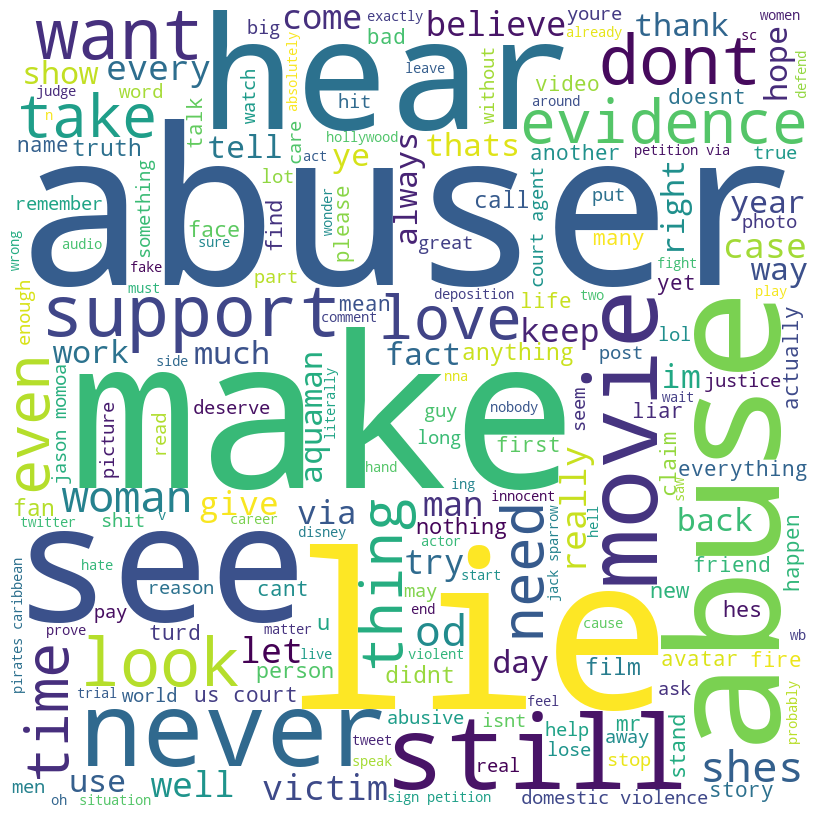

In [46]:
# importing all necessary modules

# Note that wordcloud package also provides a stop word list
# We won't be using it here - but please do explore!!!
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

comment_words = ''

# iterate through list
for tweet_text in my_results2_jan:
    # split the text into tokens
    tokens = tweet_text.split()
    # Append tokens to string comment_words
    comment_words += " ".join(tokens)+" "
    
# Let's make a word cloud
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                #stopwords = stopwords,
                min_font_size = 10).generate(comment_words)
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

# February Wordcloud

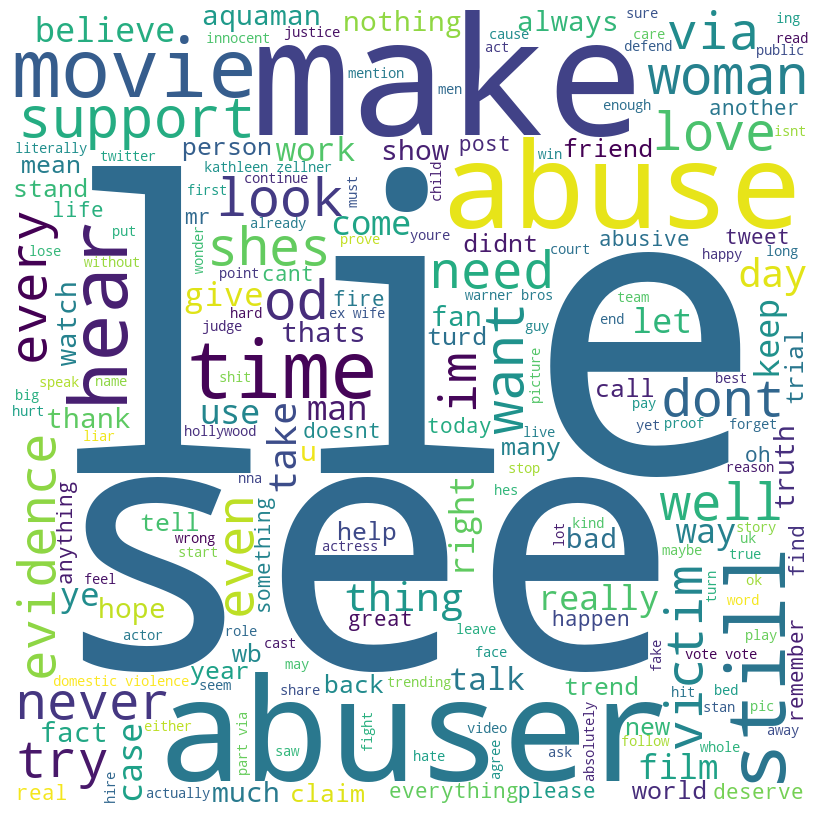

In [47]:
# importing all necessary modules

# Note that wordcloud package also provides a stop word list
# We won't be using it here - but please do explore!!!
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

comment_words = ''

# iterate through list
for tweet_text in my_results2_feb:
    # split the text into tokens
    tokens = tweet_text.split()
    # Append tokens to string comment_words
    comment_words += " ".join(tokens)+" "
    
# Let's make a word cloud
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                #stopwords = stopwords,
                min_font_size = 10).generate(comment_words)
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

# March Wordcloud

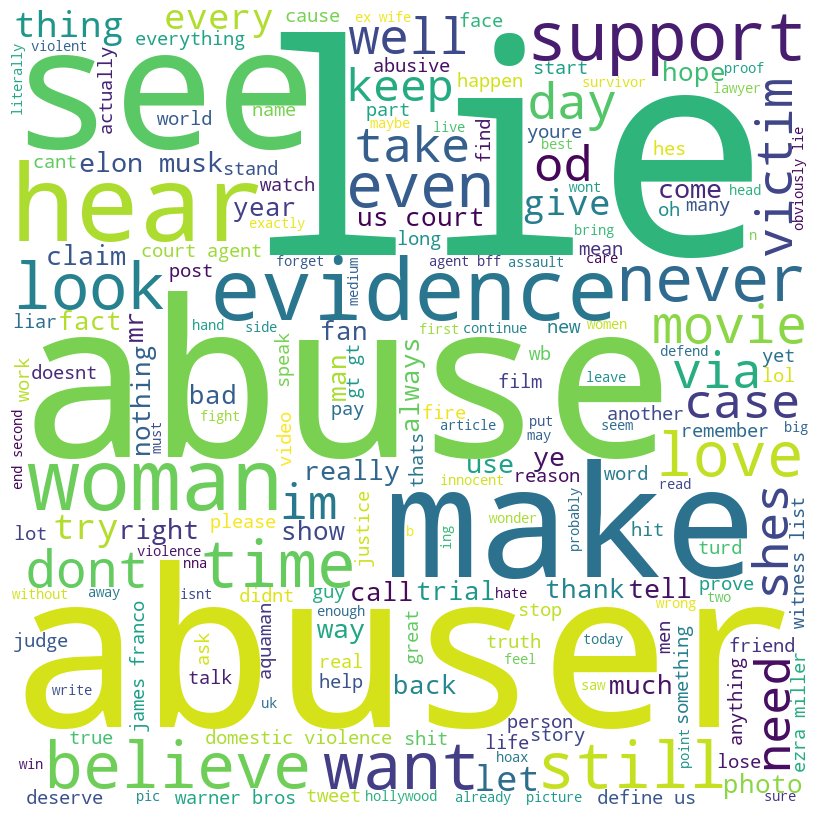

In [48]:
# importing all necessary modules

# Note that wordcloud package also provides a stop word list
# We won't be using it here - but please do explore!!!
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

comment_words = ''

# iterate through list
for tweet_text in my_results2_mar:
    # split the text into tokens
    tokens = tweet_text.split()
    # Append tokens to string comment_words
    comment_words += " ".join(tokens)+" "
    
# Let's make a word cloud
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                #stopwords = stopwords,
                min_font_size = 10).generate(comment_words)
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

# April Wordcloud (Pre-Trial 1 - 10 Apr)

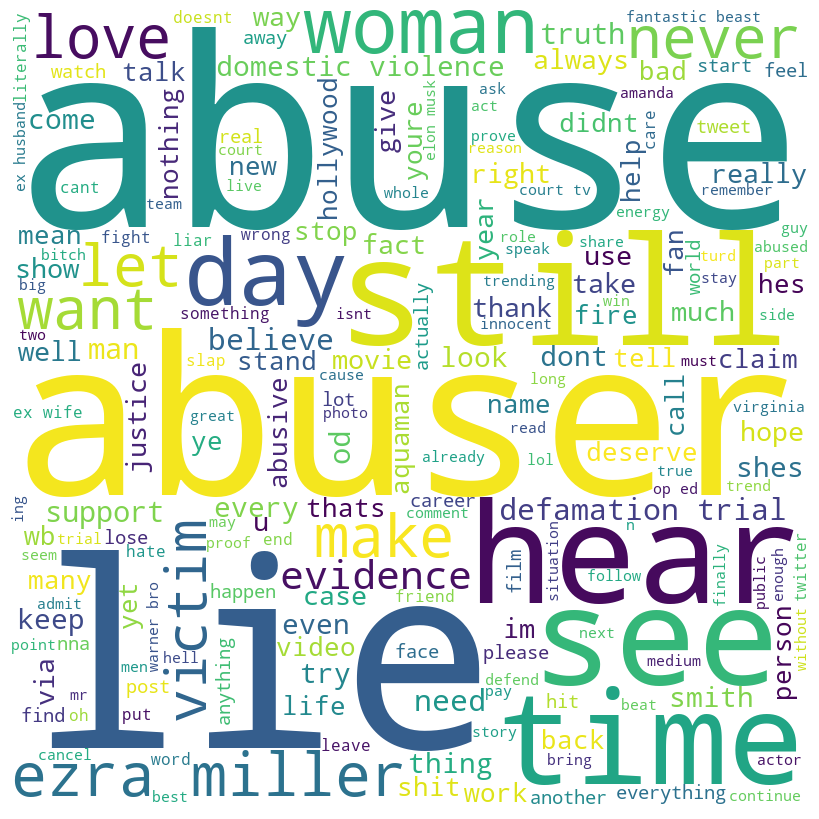

In [49]:
# importing all necessary modules

# Note that wordcloud package also provides a stop word list
# We won't be using it here - but please do explore!!!
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

comment_words = ''

# iterate through list
for tweet_text in my_results2_apr_pre:
    # split the text into tokens
    tokens = tweet_text.split()
    # Append tokens to string comment_words
    comment_words += " ".join(tokens)+" "
    
# Let's make a word cloud
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                #stopwords = stopwords,
                min_font_size = 10).generate(comment_words)
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

# April Wordcloud (Trial 11 - 17 Apr)

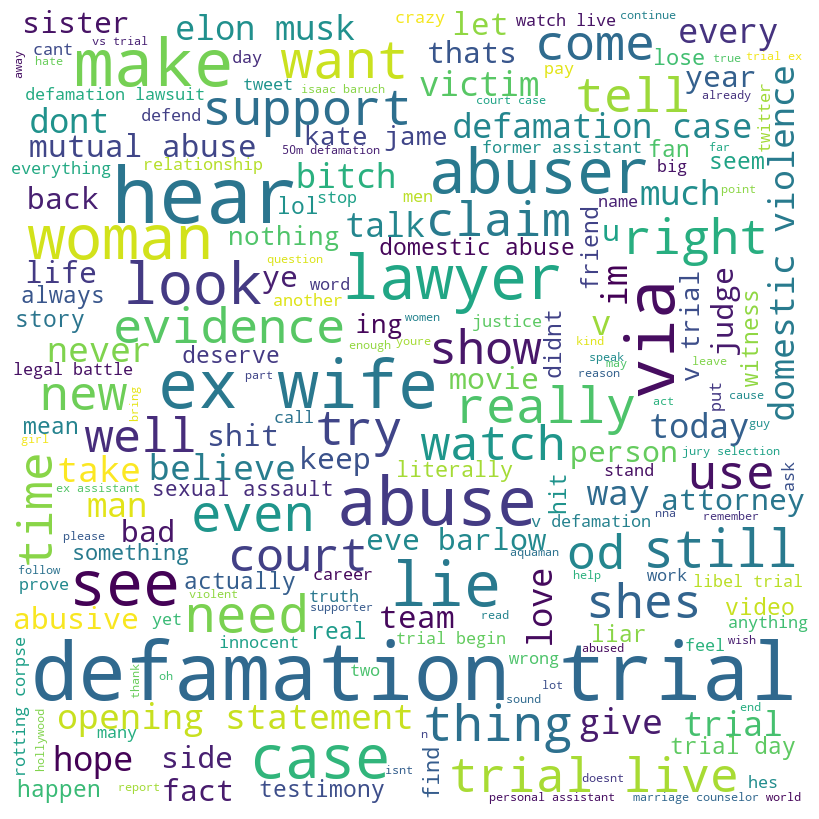

In [50]:
# importing all necessary modules

# Note that wordcloud package also provides a stop word list
# We won't be using it here - but please do explore!!!
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

comment_words = ''

# iterate through list
for tweet_text in my_results2_apr_p1:
    # split the text into tokens
    tokens = tweet_text.split()
    # Append tokens to string comment_words
    comment_words += " ".join(tokens)+" "
    
# Let's make a word cloud
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                #stopwords = stopwords,
                min_font_size = 10).generate(comment_words)
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

# April Wordcloud (Trial 18 - 30 Apr)

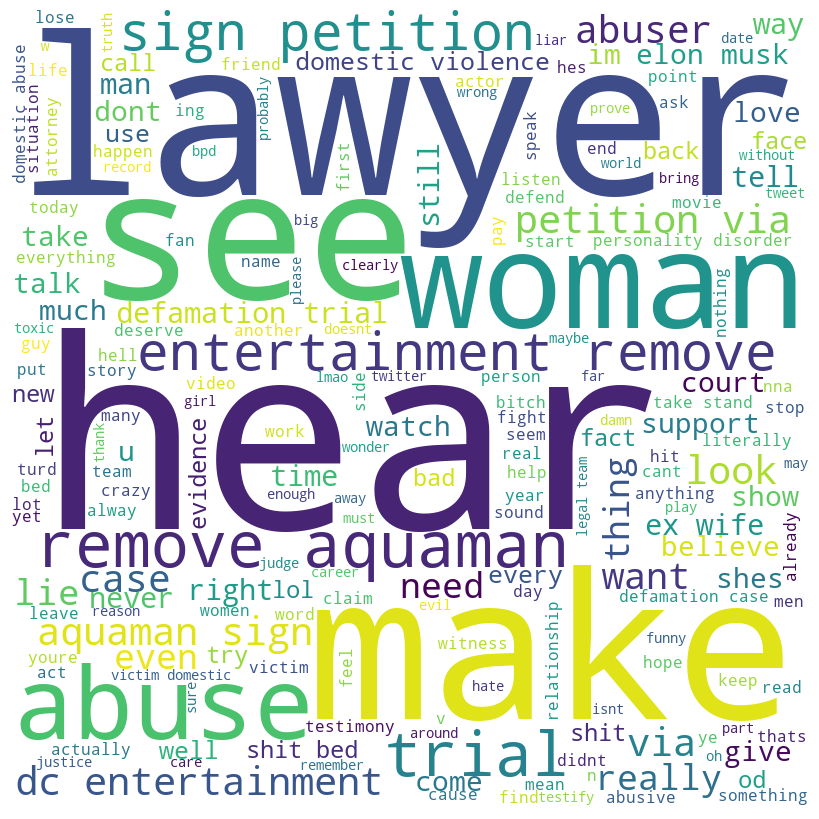

In [51]:
# importing all necessary modules

# Note that wordcloud package also provides a stop word list
# We won't be using it here - but please do explore!!!
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

comment_words = ''

# iterate through list
for tweet_text in my_results2_apr_p2:
    # split the text into tokens
    tokens = tweet_text.split()
    # Append tokens to string comment_words
    comment_words += " ".join(tokens)+" "
    
# Let's make a word cloud
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                #stopwords = stopwords,
                min_font_size = 10).generate(comment_words)
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

# May Wordcloud (Trial 1 - 14 May)

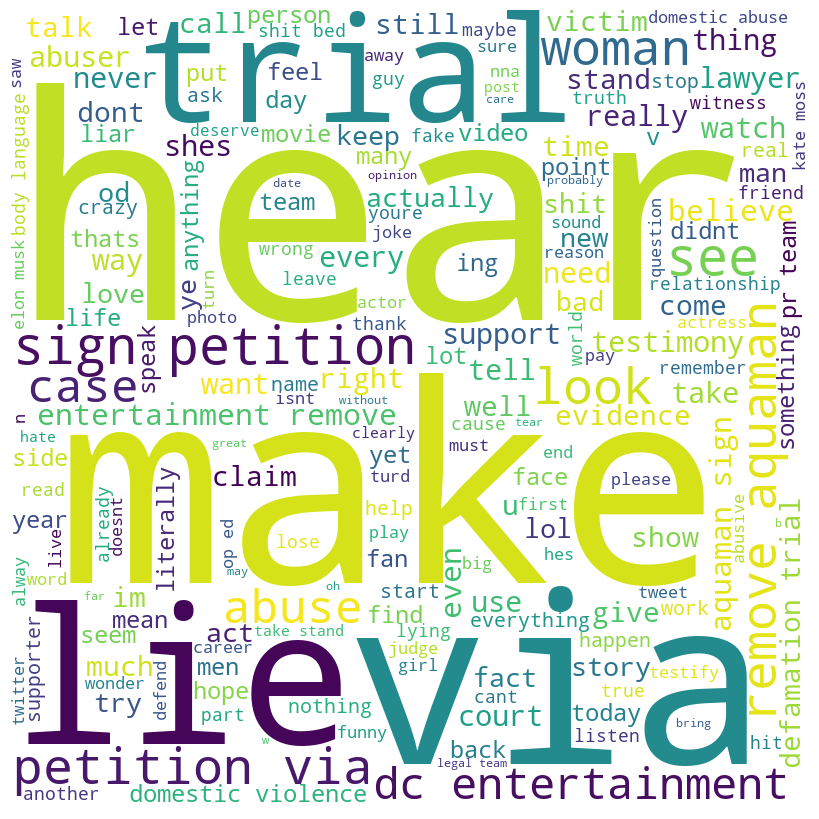

In [52]:
# importing all necessary modules

# Note that wordcloud package also provides a stop word list
# We won't be using it here - but please do explore!!!
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

comment_words = ''

# iterate through list
for tweet_text in my_results2_may_p1:
    # split the text into tokens
    tokens = tweet_text.split()
    # Append tokens to string comment_words
    comment_words += " ".join(tokens)+" "
    
# Let's make a word cloud
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                #stopwords = stopwords,
                min_font_size = 10).generate(comment_words)
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

# May & June Wordcloud (Trial 15 May - 1 June)

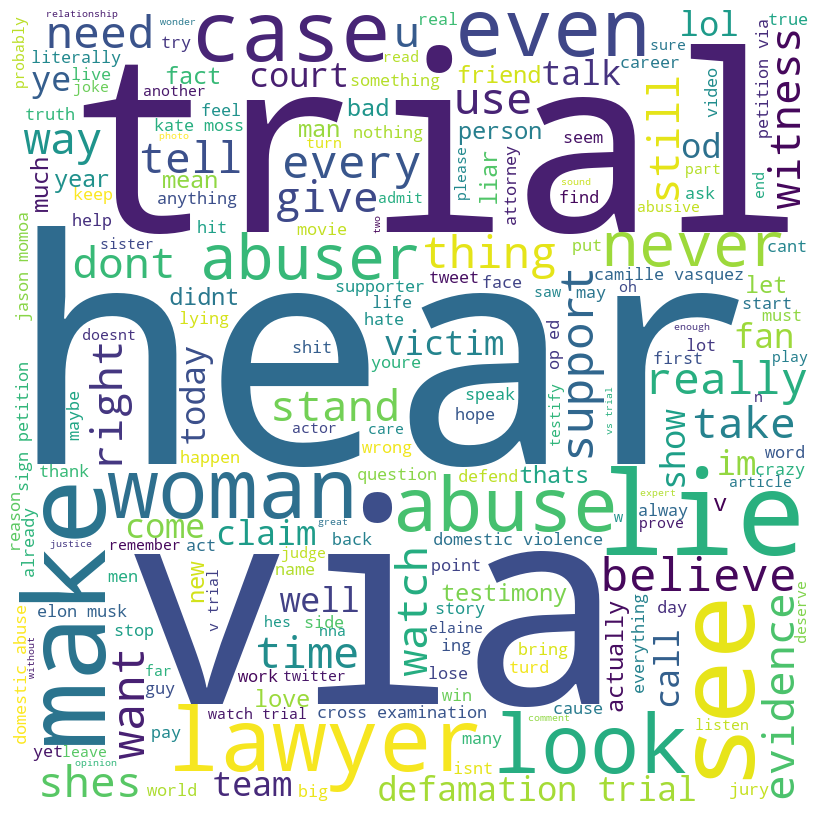

In [53]:
# importing all necessary modules

# Note that wordcloud package also provides a stop word list
# We won't be using it here - but please do explore!!!
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

comment_words = ''

# iterate through list
for tweet_text in my_results2_may_p2:
    # split the text into tokens
    tokens = tweet_text.split()
    # Append tokens to string comment_words
    comment_words += " ".join(tokens)+" "
    
# Let's make a word cloud
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                #stopwords = stopwords,
                min_font_size = 10).generate(comment_words)
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

# June Wordcloud (2 - 30 June)

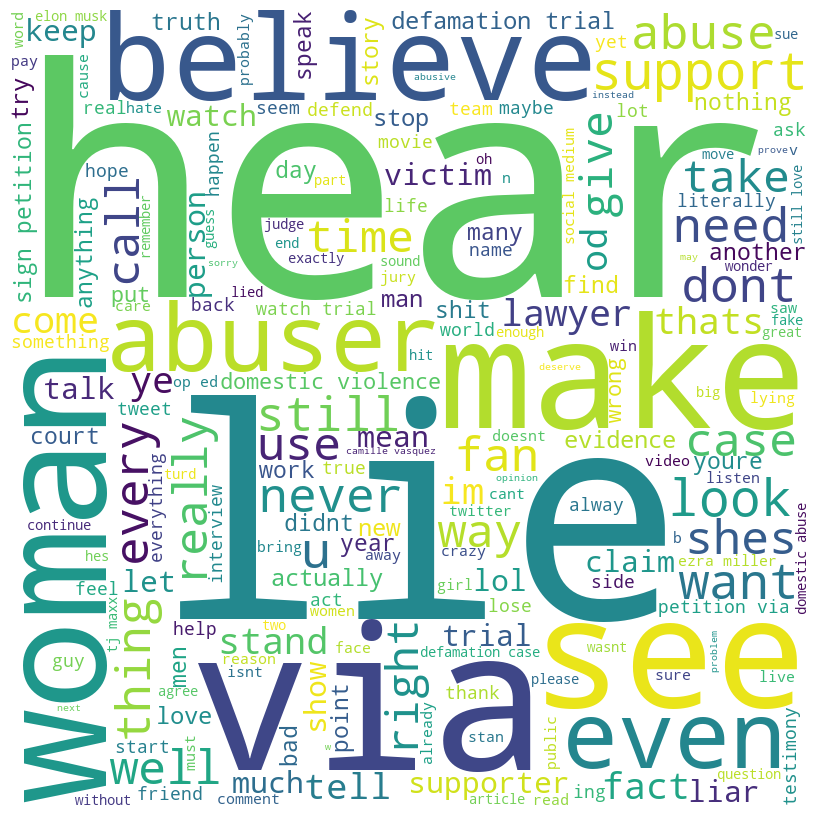

In [54]:
# importing all necessary modules

# Note that wordcloud package also provides a stop word list
# We won't be using it here - but please do explore!!!
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

comment_words = ''

# iterate through list
for tweet_text in my_results2_june:
    # split the text into tokens
    tokens = tweet_text.split()
    # Append tokens to string comment_words
    comment_words += " ".join(tokens)+" "
    
# Let's make a word cloud
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                #stopwords = stopwords,
                min_font_size = 10).generate(comment_words)
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

# July Wordcloud 

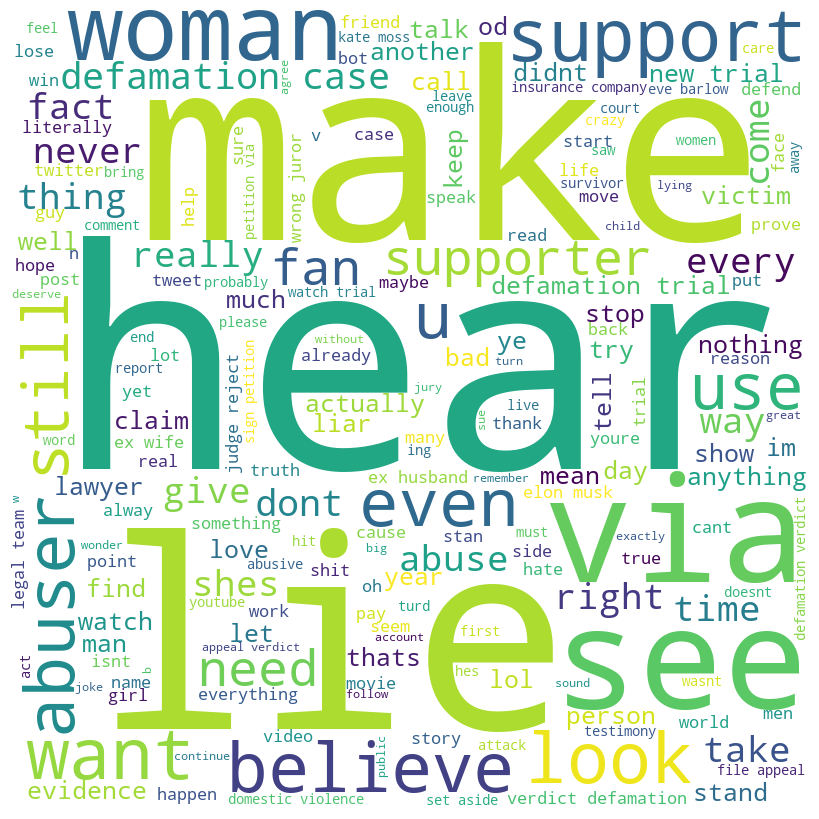

In [55]:
# importing all necessary modules

# Note that wordcloud package also provides a stop word list
# We won't be using it here - but please do explore!!!
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

comment_words = ''

# iterate through list
for tweet_text in my_results2_july:
    # split the text into tokens
    tokens = tweet_text.split()
    # Append tokens to string comment_words
    comment_words += " ".join(tokens)+" "
    
# Let's make a word cloud
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                #stopwords = stopwords,
                min_font_size = 10).generate(comment_words)
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

# August Wordcloud

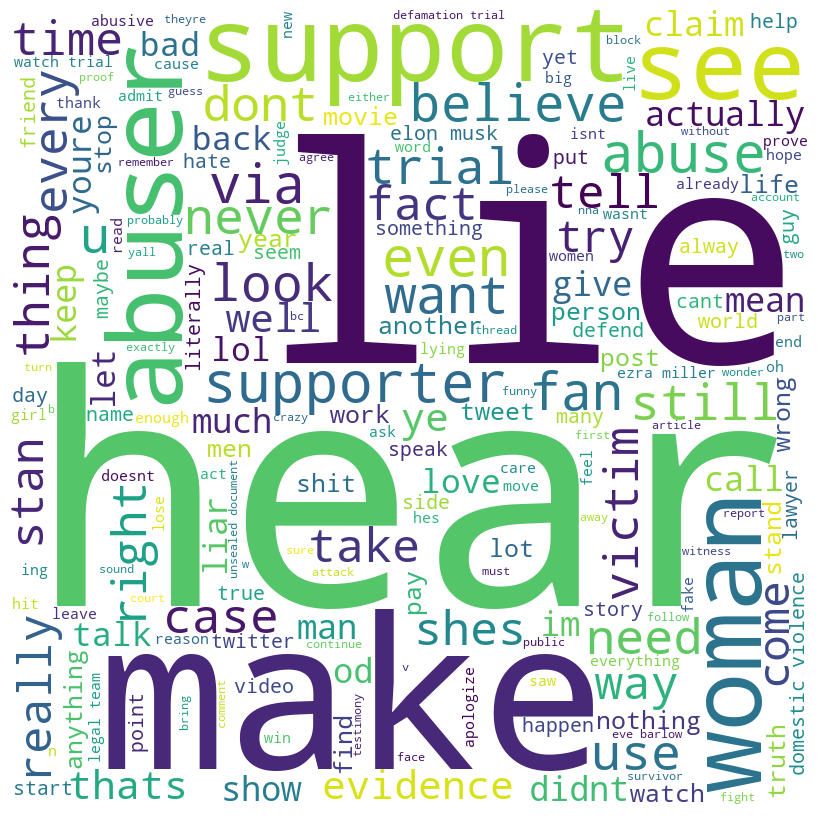

In [56]:
# importing all necessary modules

# Note that wordcloud package also provides a stop word list
# We won't be using it here - but please do explore!!!
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

comment_words = ''

# iterate through list
for tweet_text in my_results2_aug:
    # split the text into tokens
    tokens = tweet_text.split()
    # Append tokens to string comment_words
    comment_words += " ".join(tokens)+" "
    
# Let's make a word cloud
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                #stopwords = stopwords,
                min_font_size = 10).generate(comment_words)
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()